# Kalibrierung von Digitalkameras
## 1. Aufnahme und Analyse eines Grauwertkeiles
Zuerst wird die Aufnahme des Grauwertkeiles eingelesen und anschließend die einzelnen Grauwertstufen extrahiert. Dazu wird das Bild in sechs Spalten aufgeteilt und bei jeder Spalte ein Rand mit einer Breite von 40 Pixeln entfernt.

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from prettytable import PrettyTable


GREYSCALE_PATH = "Bilder/aufnahme.png"
COLUMN_AMOUNT = 6
BORDER_TRIM = 40
IMAGE_AMOUNT = 10
DARK_PATH = "Bilder/schwarz"
WHITE_PATH = "Bilder/weiss"


def get_columns(image):
    height, width = image.shape
    column_width = width // COLUMN_AMOUNT

    columns = []

    for i in range(COLUMN_AMOUNT):
        start = i * column_width
        end = (i + 1) * column_width

        column = image[:, start:end]
        column = column[BORDER_TRIM:-BORDER_TRIM, BORDER_TRIM:-BORDER_TRIM]

        columns.append(column)

    return columns

Im Anschluss werden die einzelnen Spalten angezeigt und eine Tabelle mit den Mittelwerten und Standardabweichungen der Spalten angezeigt.

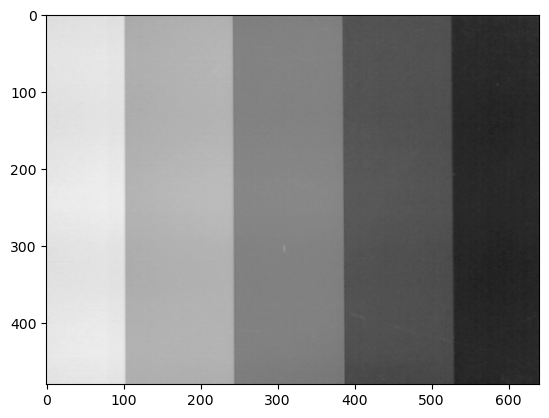

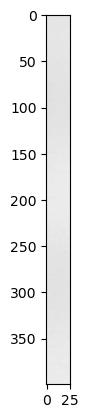

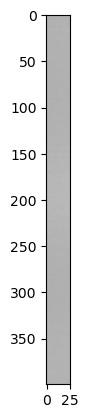

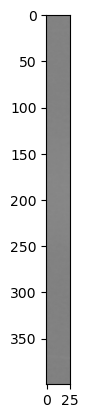

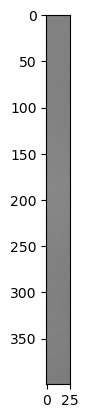

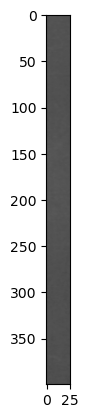

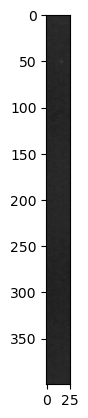

+---------------+--------------------+--------------------+
| Grauwertstufe |     Mittelwert     | Standardabweichung |
+---------------+--------------------+--------------------+
|       1       | 230.41384615384615 | 3.405352209190564  |
|       2       | 178.65548076923076 | 2.5137427580156904 |
|       3       | 131.0564423076923  | 2.095137877907043  |
|       4       | 130.0341346153846  | 2.556682086136445  |
|       5       | 81.67028846153846  | 2.3582999730619063 |
|       6       |       38.575       | 2.7315376762774255 |
+---------------+--------------------+--------------------+


In [17]:
def get_table(columns):
    table = PrettyTable(["Grauwertstufe", "Mittelwert", "Standardabweichung"])

    for i in range(len(columns)):
        column = columns[i]

        table.add_row([i + 1, column.mean(), column.std()])

    return table


def show_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


greyscale_image = cv2.imread(GREYSCALE_PATH)
greyscale_image = cv2.cvtColor(greyscale_image, cv2.COLOR_BGR2GRAY)

show_image(greyscale_image)

greyscale_columns = get_columns(greyscale_image)

for greyscale_column in greyscale_columns:
    show_image(greyscale_column)

print(get_table(greyscale_columns))

## 2. Aufnahme eines Dunkelbildes
Die 10 Bilder, bei dem das Objektiv abgedeckt wurde, werden eingelesen. Ein neues Bild, bestehend aus den Mittelwerten der Pixel dieser Bilder wird erstellt. Das kontrastmaximierte Bild sieht so aus:

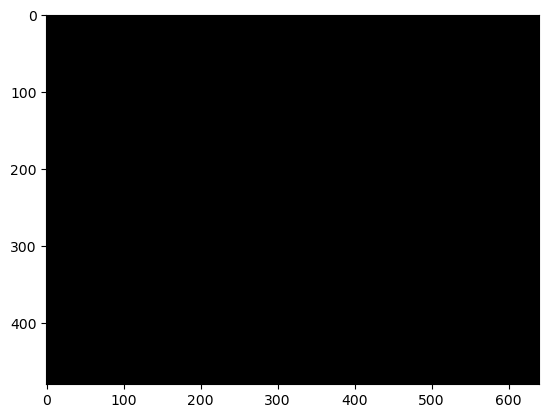

In [18]:
def get_mean_image(path):
    images = []

    for i in range(IMAGE_AMOUNT):
        image = cv2.imread(path + f"{i + 1}.png")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = image.astype(np.float64)

        images.append(image)

    return np.mean(images, axis=0)


dark_image = get_mean_image(DARK_PATH)
contrast_dark_image = dark_image / 255

show_image(contrast_dark_image.astype(np.uint8))

## 3. Aufnahme eines Weißbildes
Das gleiche wird anschließend mit den "weißen" Bildern gemacht. Von diesem Mittelwertbild wird das Dunkelbild subtrahiert. Kontrastmaximiert sieht es so aus:

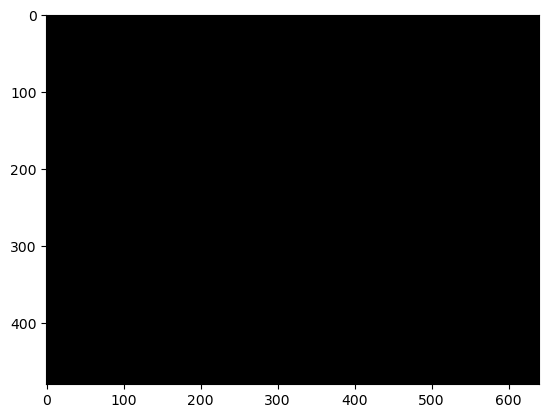

In [19]:
white_image = get_mean_image(WHITE_PATH)
subtracted_white_image = white_image - dark_image
contrast_white_image = subtracted_white_image / 255

show_image(contrast_white_image.astype(np.uint8))

Das Mittelwertbild lässt sich folgendermaßen normieren, sodass sein Mittelwert 1 ist:

In [20]:
standardized_white_image = subtracted_white_image / white_image.mean()

print(standardized_white_image.mean())

1.0


## 4. Pixelfehler
Es lassen sich weder Stuck und Hot Pixels in dem Dunkelbild, noch Dead Pixels in dem Weißbild finden. Das Bild des Grauwertkeils lässt sich so korrigieren:

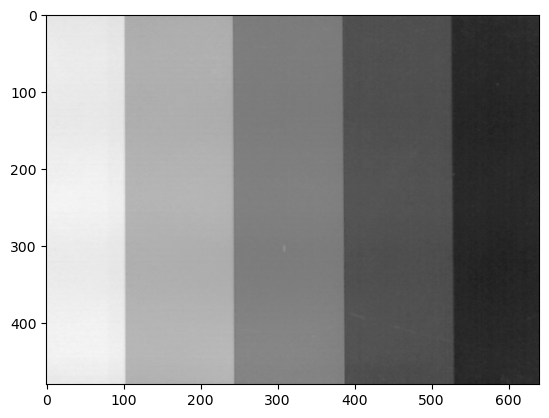

In [21]:
corrected_greyscale_image = (greyscale_image - dark_image) / standardized_white_image

show_image(corrected_greyscale_image.astype(np.uint8))

Die Tabelle hierzu, analog zu Aufgabe 1, ergibt folgende Werte:

In [22]:
corrected_greyscale_columns = get_columns(corrected_greyscale_image.astype(np.uint8))

print(get_table(corrected_greyscale_columns))

+---------------+--------------------+--------------------+
| Grauwertstufe |     Mittelwert     | Standardabweichung |
+---------------+--------------------+--------------------+
|       1       | 237.19326923076923 | 3.7619492804998385 |
|       2       |     177.40625      | 2.6484500864801896 |
|       3       | 127.02298076923077 | 2.8163244526700217 |
|       4       | 125.71740384615384 | 2.606103226891824  |
|       5       | 80.46596153846154  | 1.955710336833559  |
|       6       | 38.68682692307692  | 2.6217469823144923 |
+---------------+--------------------+--------------------+
